## PDC Project

In [1]:
import client
import channel_helper
import transmitter
import reciever

import matplotlib.pyplot as plt
import numpy as np

### Transmitter

In [2]:
transmitter.run()

Codeword: 
 11111111 
4518


### Channel Effect

In [3]:
!python client.py --input_file=passband.txt --output_file=output.txt --srv_hostname=iscsrv72.epfl.ch --srv_port=80

Traceback (most recent call last):
  File "client.py", line 64, in <module>
    sock_cl.connect((args.srv_hostname, args.srv_port))
ConnectionRefusedError: [Errno 61] Connection refused


### Reciever

In [4]:
reciever.run()

54


### Plots

In [5]:
def compute_array(datapath):
    f = open(datapath, 'r')
    array = f.read().split('\n')
    length = len(array)
    plot_array = array[:(length-1)]
    
    
    plot_array = list(map(float, plot_array))
    return plot_array


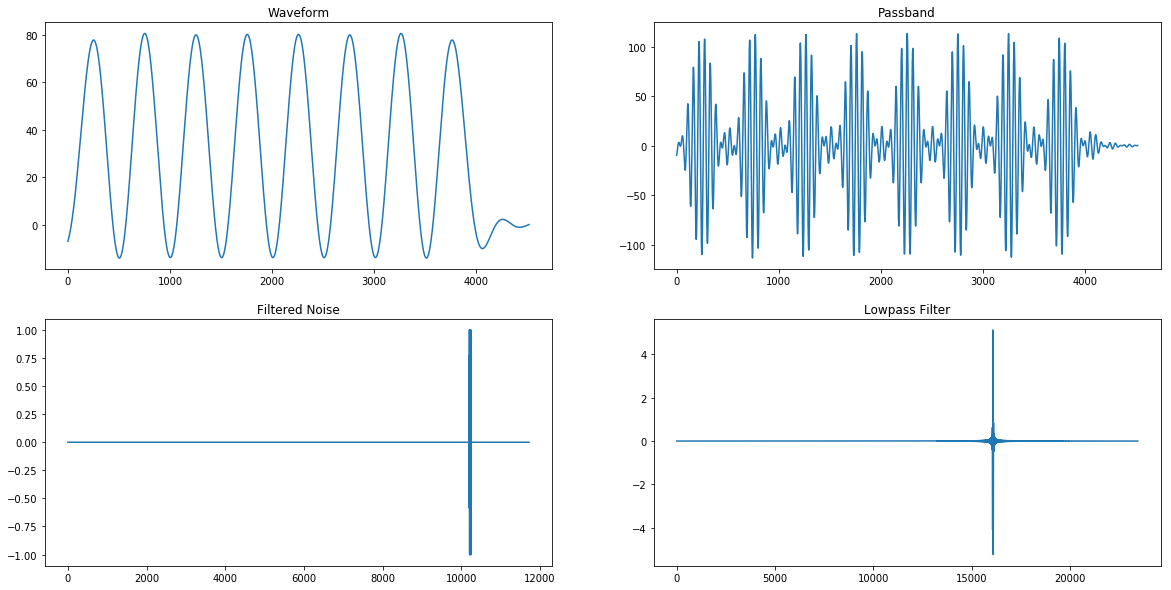

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

waveform = compute_array("waveform.txt")
passband = compute_array("passband.txt")
filtered_noise = compute_array("filtered_noise.txt")
lowpass = compute_array("lowpass.txt")


ax[0][0].plot(waveform)
ax[0][0].set_title('Waveform')
ax[0][1].plot(passband)
ax[0][1].set_title('Passband')
ax[1][0].plot(filtered_noise)
ax[1][0].set_title('Filtered Noise')
ax[1][1].plot(lowpass)
ax[1][1].set_title('Lowpass Filter')


plt.show()

### Closer look

<function matplotlib.pyplot.show(*args, **kw)>

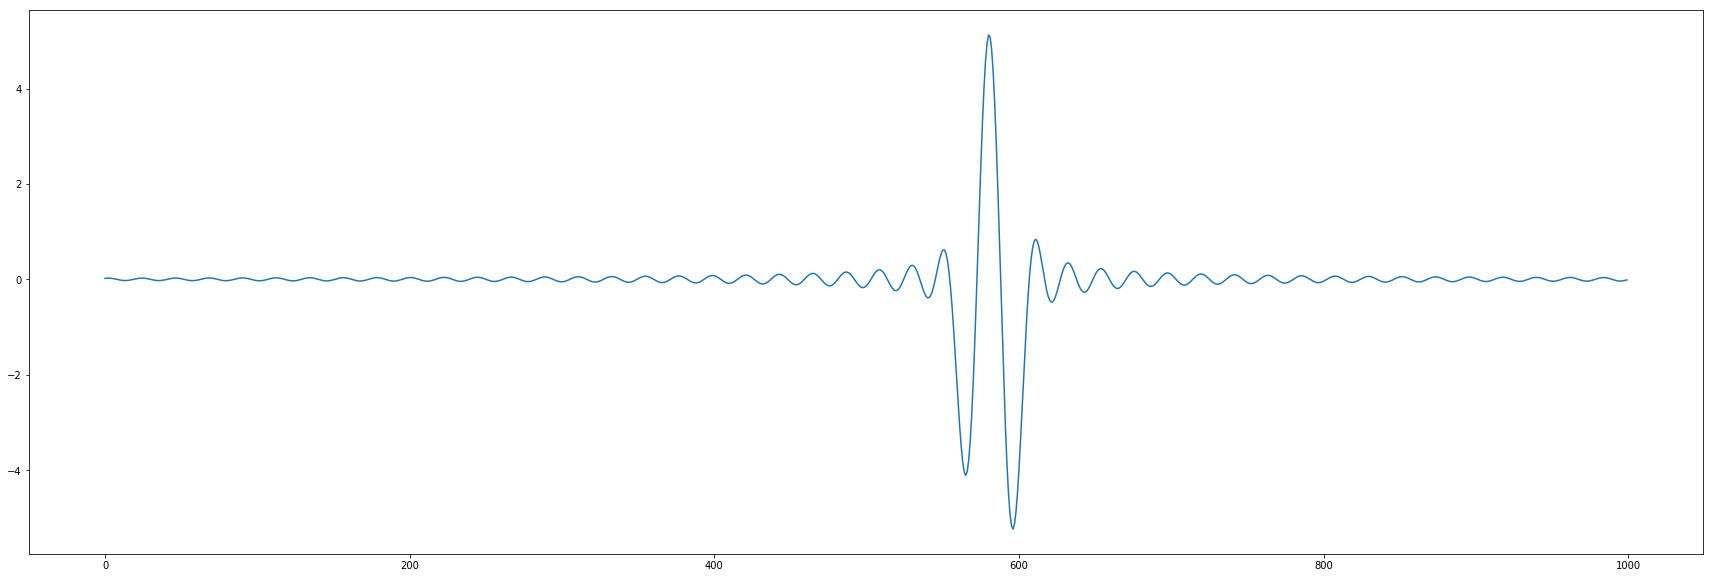

In [7]:
detail_lowpass = lowpass[15500:16500]
plt.figure(figsize=(30,10))
plt.plot(detail_lowpass)
plt.show

### TESTS

<function matplotlib.pyplot.show(*args, **kw)>

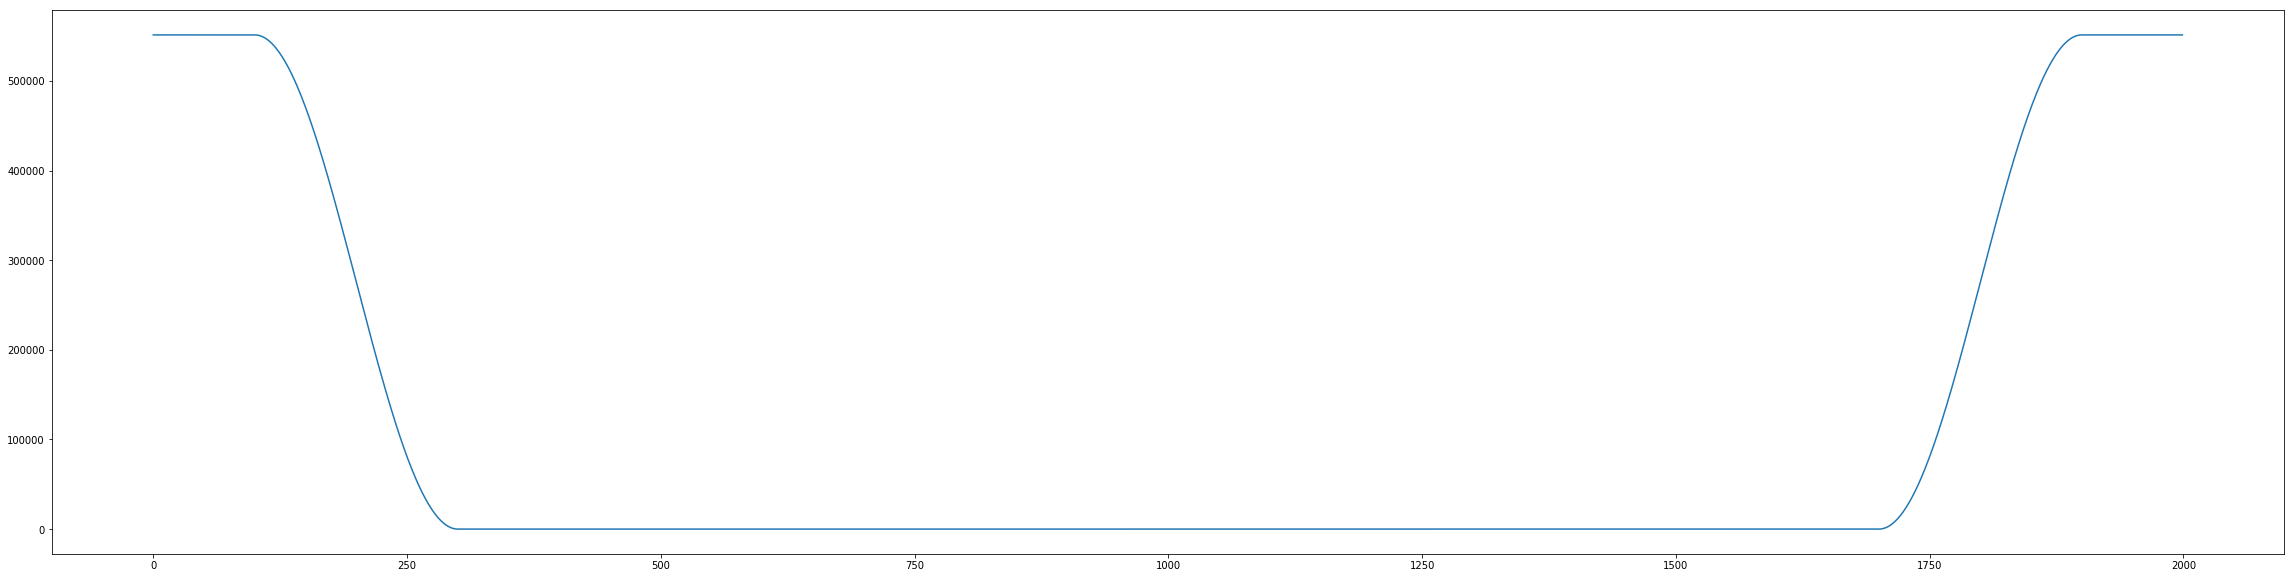

In [8]:
temp1 = compute_array("passband_before.txt")
#detail_sinc = sinc[6700:7500]

plt.figure(figsize=(40,10))
plt.plot(temp1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

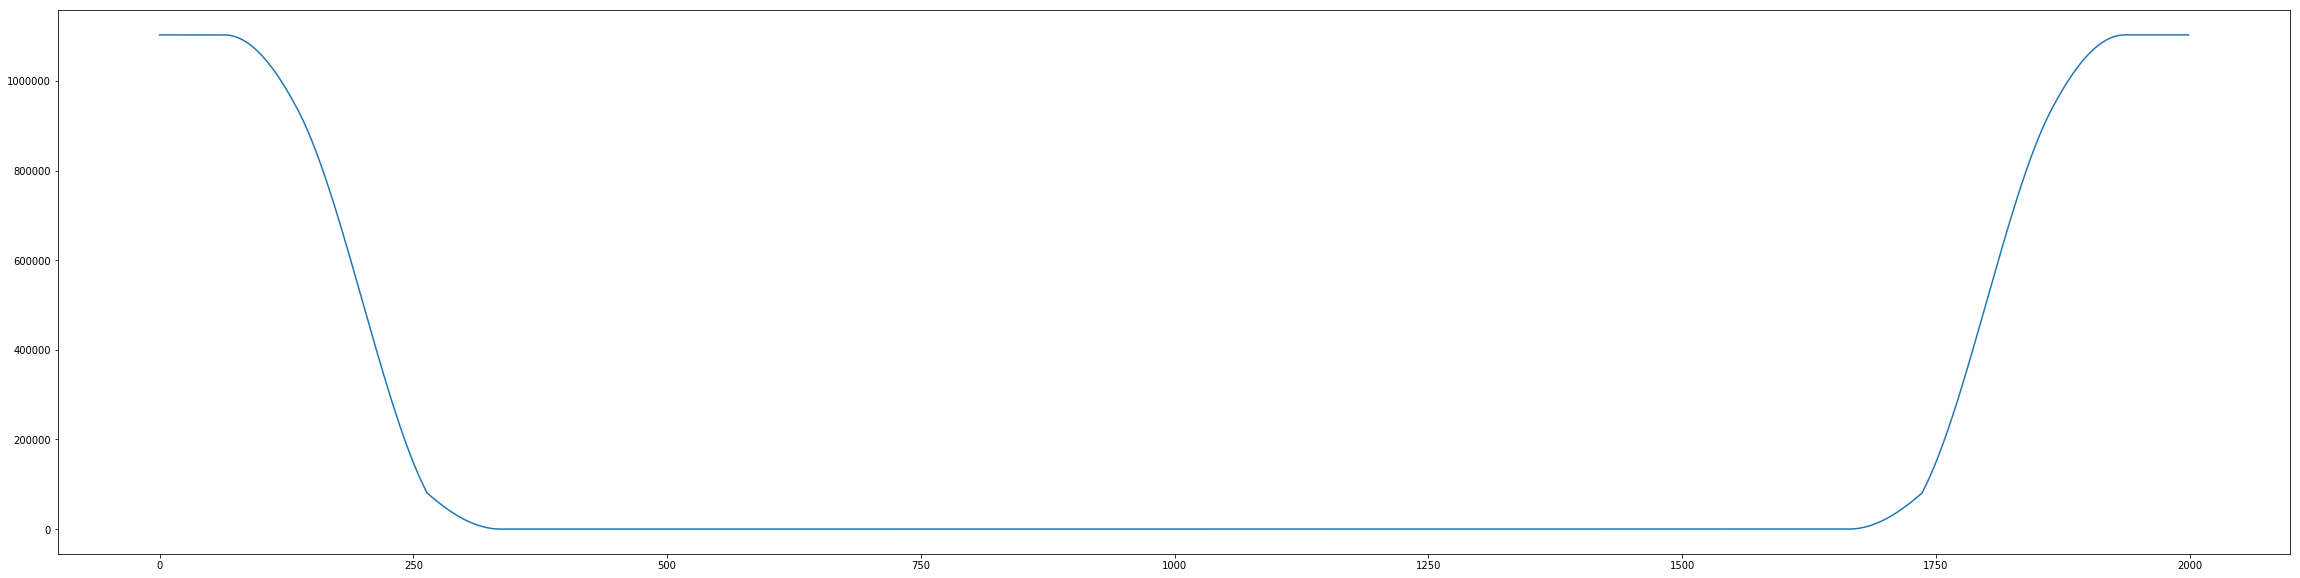

In [9]:
temp2 = compute_array("passband_after.txt")
#detail_phi = phi[900:1100]

plt.figure(figsize=(40,10))
plt.plot(temp2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

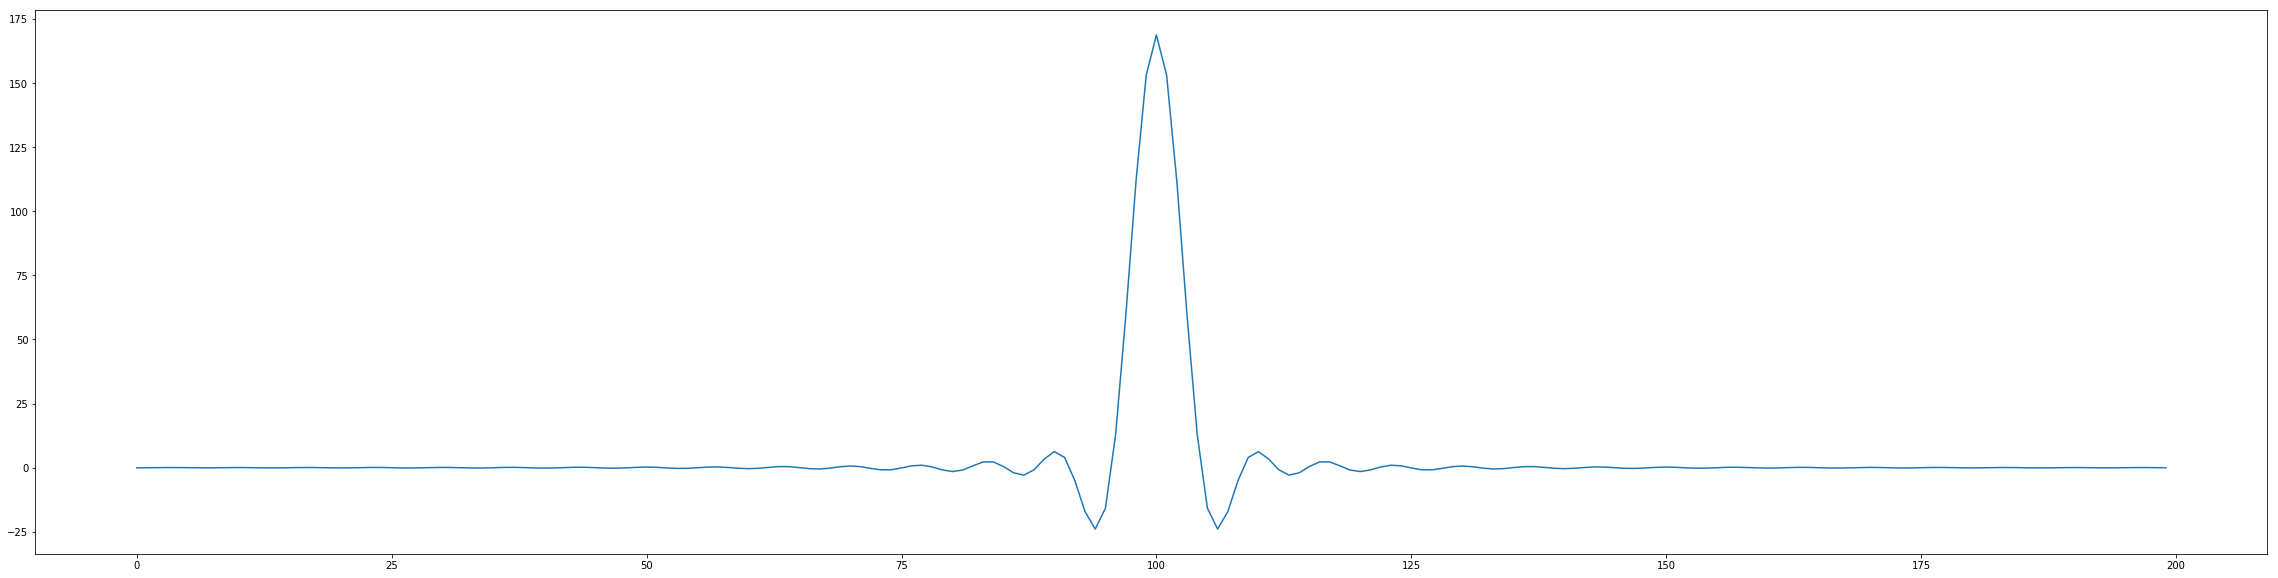

In [10]:
temp3 = compute_array("phi_before.txt")
detail_temp3 = temp3[900:1100]

plt.figure(figsize=(40,10))
plt.plot(detail_temp3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

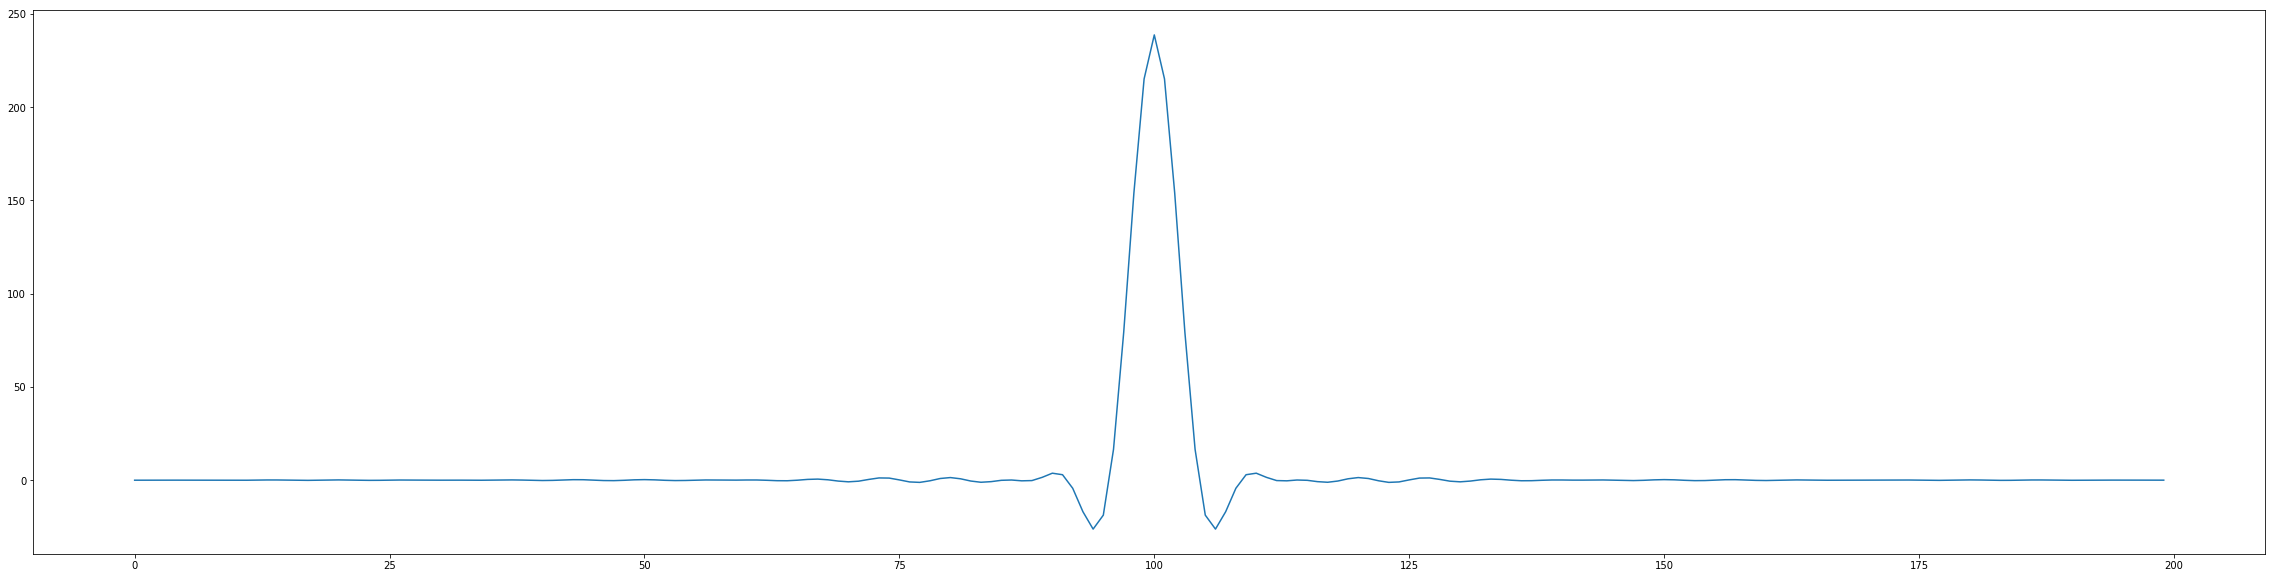

In [11]:
temp4 = compute_array("phi_after.txt")
detail_temp4 = temp4[900:1100]

plt.figure(figsize=(40,10))
plt.plot(detail_temp4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

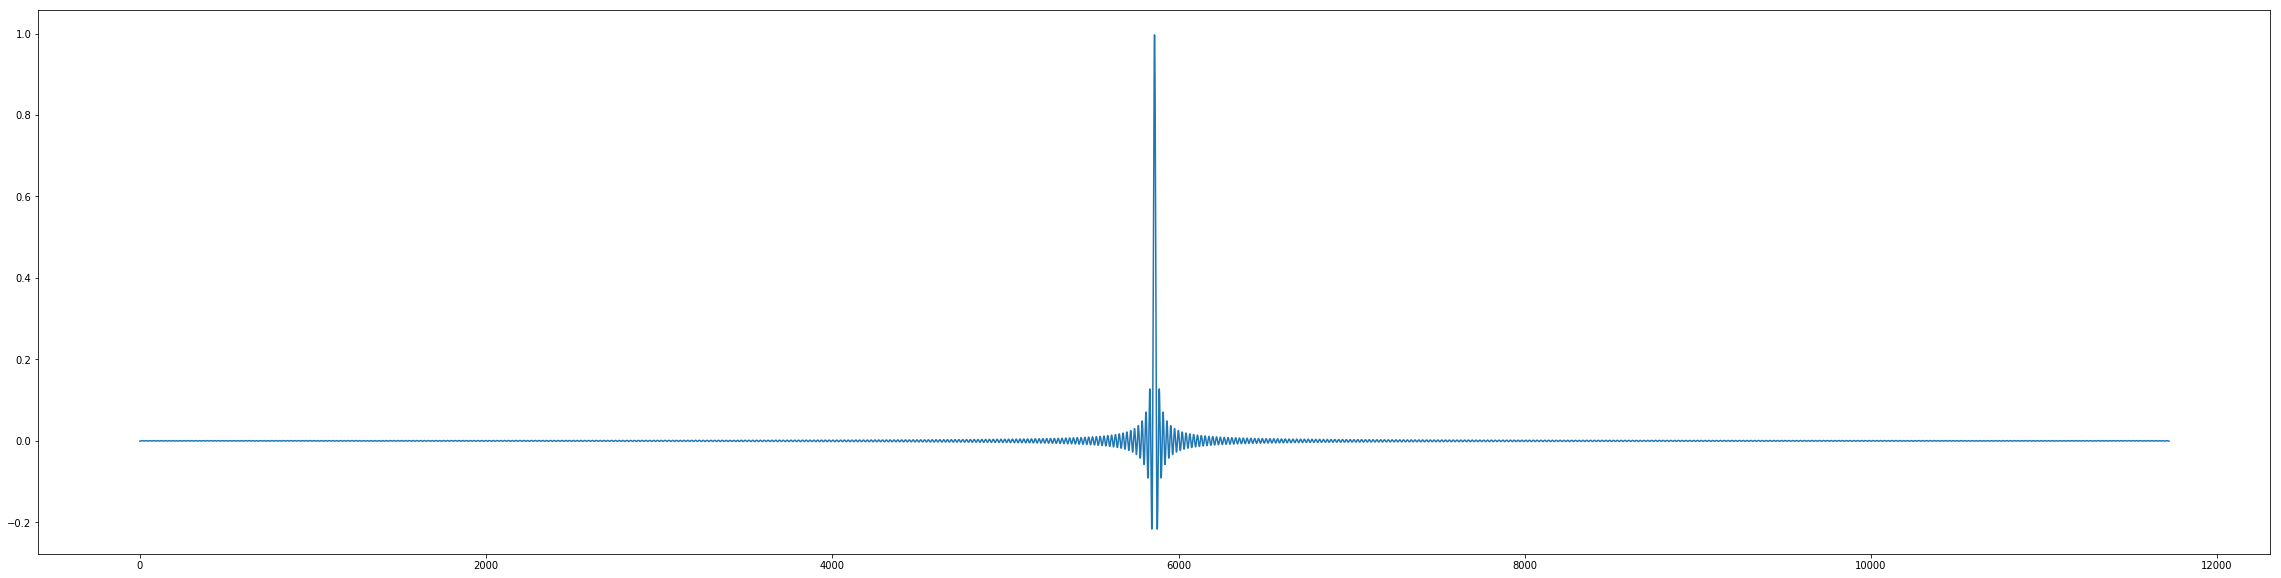

In [12]:
temp5 = compute_array("sinc.txt")
#detail_pt = pt[0:400]

plt.figure(figsize=(40,10))
plt.plot(temp5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

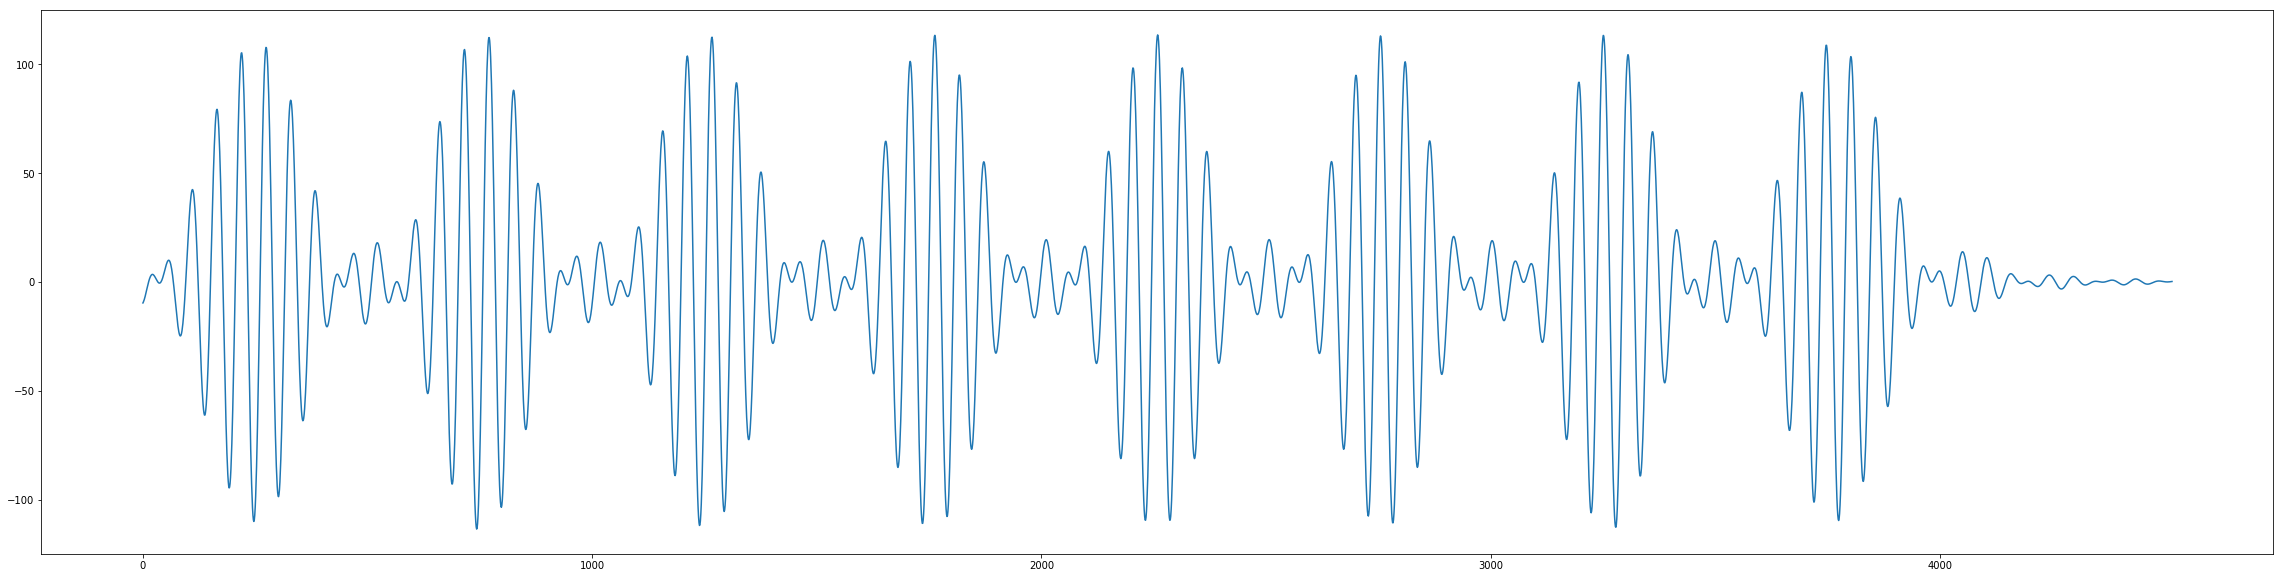

In [13]:
temp6 = compute_array("passband.txt")
#detail_pt = pt[0:400]

plt.figure(figsize=(40,10))
plt.plot(temp6)
plt.show

## Ask for shift in frequency domain and lowpass filter!